In [74]:
import pandas as pd
import numpy as np
import os

path="C:/Users/g6falle/Desktop/Folders/Python/LC"

os.chdir(path)

old_data = pd.read_csv('loan_old.csv',error_bad_lines = False,low_memory = False)

dtype= old_data.dtypes

new_data = pd.read_csv('loan_new.csv',error_bad_lines = False,low_memory=False)

dtype= new_data.dtypes



In [75]:
print(dtype)

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [76]:
import pandas as pd
import numpy as np
import os

In [77]:
path="C:/Users/g6falle/Desktop/Folders/Python/LC"

In [78]:
print(path)

C:/Users/g6falle/Desktop/Folders/Python/LC


In [79]:
os.chdir(path)

In [80]:
old_data = pd.read_csv('loan_old.csv',error_bad_lines = False,low_memory = False)

In [81]:
print(old_data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        Na

In [82]:
G = new_data['grade'] == 'G'
grade_g_2M = new_data[G]

G1 = old_data['grade'] == 'G'
grade_g_88T = old_data[G1]

p = list(grade_g_88T['loan_status'].values)

In [83]:
DN_fullpaid = grade_g_88T['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'
g_DN_fullpaid = grade_g_88T[DN_fullpaid]

DN_chargedoff = grade_g_88T['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'
g_DN_chargedoff= grade_g_88T[DN_chargedoff]


doNotMeet = grade_g_88T['loan_status'].str.startswith('Does not')
grade_g_DonotMeet = grade_g_88T[doNotMeet]

In [84]:
# Making seprate Df for description
old_data['desc'].isnull().sum()/len(old_data)*100
old_data_desc = old_data.dropna(axis = 0, subset = ['desc'])

In [85]:
#slicing the dataset 
a = new_data.loc[:200000]
frames = [old_data,a]

In [86]:
# Merging the two files
df = pd.concat(frames, sort = False)

In [87]:
df = df

In [88]:
#OG SS
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,8.873790e+05,8.873790e+05,1.087380e+06,1.087380e+06,1.087380e+06,1.087380e+06,1.087380e+06,1.087376e+06,1.086988e+06,1.087351e+06,...,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.0
mean,3.246513e+07,3.500182e+07,1.499156e+04,1.498064e+04,1.494794e+04,1.318568e+01,4.421046e+02,7.629274e+04,1.847918e+01,2.983600e-01,...,3.0,241.364000,3.0,4.400000,724.092000,19267.584000,337.378000,10140.833333,64.168333,18.0
std,2.282734e+07,2.411335e+07,8.784963e+03,8.780904e+03,8.791503e+03,4.541352e+00,2.525541e+02,7.245235e+04,1.771887e+01,8.417200e-01,...,0.0,129.603867,0.0,9.838699,388.811601,13069.848678,427.062095,7478.723833,2.042062,0.0
min,5.473400e+04,7.047300e+04,5.000000e+02,5.000000e+02,0.000000e+00,5.320000e+00,1.567000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,3.0,119.590000,3.0,0.000000,358.770000,8096.800000,1.010000,3422.000000,60.000000,18.0
25%,9.206643e+06,1.087713e+07,8.000000e+03,8.000000e+03,8.000000e+03,9.760000e+00,2.598600e+02,4.532650e+04,1.188000e+01,0.000000e+00,...,3.0,126.270000,3.0,0.000000,378.810000,9649.700000,1.210000,5245.750000,65.000000,18.0
50%,3.443327e+07,3.709528e+07,1.300000e+04,1.300000e+04,1.300000e+04,1.298000e+01,3.827600e+02,6.500000e+04,1.771000e+01,0.000000e+00,...,3.0,203.670000,3.0,0.000000,611.010000,15351.850000,292.830000,7781.000000,65.000000,18.0
75%,5.490814e+07,5.847135e+07,2.000000e+04,2.000000e+04,2.000000e+04,1.614000e+01,5.815800e+02,9.000000e+04,2.416000e+01,0.000000e+00,...,3.0,378.390000,3.0,0.000000,1135.170000,23090.220000,346.430000,12411.000000,65.000000,18.0
max,6.861706e+07,7.354484e+07,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.618240e+03,9.757200e+06,9.999000e+03,5.800000e+01,...,3.0,378.900000,3.0,22.000000,1136.700000,40149.350000,1045.410000,23506.000000,65.010000,18.0


In [89]:
#OG Skew
df.skew()

id                                              0.023905
member_id                                       0.017412
loan_amnt                                       0.734694
funded_amnt                                     0.736597
funded_amnt_inv                                 0.734682
int_rate                                        0.522748
installment                                     0.961632
annual_inc                                     46.486878
dti                                           335.187088
delinq_2yrs                                     5.908130
inq_last_6mths                                  2.144256
mths_since_last_delinq                          0.448773
mths_since_last_record                         -0.293150
open_acc                                        1.281897
pub_rec                                        13.283013
revol_bal                                      15.778608
revol_util                                     -0.071210
total_acc                      

In [90]:
type(df)

pandas.core.frame.DataFrame

In [91]:
df = df.dropna(axis=0, subset=['id'])

In [92]:
#Removing rows for grade = G and loan status = "Does not Meet the credit policy. Status: Fully paid & charged off"

df = df[(df['grade'] != "G") & (df['loan_status'] != 'Does not meet the credit policy. Status:Charged Off') & (df['loan_status'] != 'Does not meet the credit policy. Status:Fully Paid')]

In [93]:
# Percentage of null values
Null_percentage = df.isnull().sum()/len(df)*100

In [94]:
#selecting the columns which are less than 10% null value

df_clean= df.loc[:, df.isnull().mean()<0.1]
df_clean = df_clean[(df_clean['loan_status'] != "Issued")]

In [95]:
#Remove people earning more than 250,000$

df_clean = df_clean[(df_clean['annual_inc'] < 250000)&(df_clean['annual_inc'] != 0)]

df_head1 = df_clean.head()

In [96]:
#Revol high credit dis

df_clean = df_clean[(df_clean['total_rev_hi_lim'] < 250000)]

#Total Cur Bal under 600k only

df_clean= df_clean[df_clean['tot_cur_bal'] < 600000]

#Remove Revol balance 

df_clean= df_clean[df_clean['revol_bal'] < 85000]

#dffun['delinq_2yrs'] less than 3

df_clean = df_clean[df_clean['delinq_2yrs'] <3]

#KEEP ONLY RENT,MORTGAG,OWN

df_clean = df_clean[(df_clean['home_ownership']=='RENT')|(df_clean['home_ownership']=='MORTGAGE')|(df_clean['home_ownership'] == 'OWN')]

In [97]:
#Revol_Uti

df_clean = df_clean[df_clean['revol_util'] < 100]

In [98]:
# Open_accounts drop over 30.35

df_clean = df_clean[df_clean['open_acc'] < 30.35]

In [99]:
#Making grade A Late_Fee Average for loan_status = "Fully paid"

fullyPaid_A = df_clean[(df_clean['grade'] == 'A') & (df_clean['loan_status'] == "Fully Paid")]
fullyPaid_A_LateFee = fullyPaid_A[(fullyPaid_A['total_rec_late_fee'] > 0)]
fullPaid_A_Mean = fullyPaid_A_LateFee['total_rec_late_fee'].mean()

In [100]:
#Making grade B Late_Fee Average for loan_status = "Fully paid"


fullyPaid_B = df_clean[(df_clean['grade'] == 'B') & (df_clean['loan_status'] == "Fully Paid")]
fullyPaid_B_LateFee = fullyPaid_B[(fullyPaid_B['total_rec_late_fee'] > 0)]
fullPaid_B_Mean = fullyPaid_B_LateFee['total_rec_late_fee'].mean()

In [101]:
#Making grade C Late_Fee Average for loan_status = "Fully paid"


fullyPaid_C = df_clean[(df_clean['grade'] == 'C') & (df_clean['loan_status'] == "Fully Paid")]
fullyPaid_C_LateFee = fullyPaid_C[(fullyPaid_C['total_rec_late_fee'] > 0)]
fullPaid_C_Mean = fullyPaid_C_LateFee['total_rec_late_fee'].mean()

In [102]:
#Making grade D Late_Fee Average for loan_status = "Fully paid"


fullyPaid_D = df_clean[(df_clean['grade'] == 'D') & (df_clean['loan_status'] == "Fully Paid")]
fullyPaid_D_LateFee = fullyPaid_D[(fullyPaid_D['total_rec_late_fee'] > 0)]
fullPaid_D_Mean = fullyPaid_D_LateFee['total_rec_late_fee'].mean()

In [103]:
#Making grade E Late_Fee Average for loan_status = "Fully paid"

fullyPaid_E= df_clean[(df_clean['grade'] == 'E') & (df_clean['loan_status'] == "Fully Paid")]
fullyPaid_E_LateFee = fullyPaid_E[(fullyPaid_E['total_rec_late_fee'] > 0)]
fullPaid_E_Mean = fullyPaid_E_LateFee['total_rec_late_fee'].mean()

In [104]:
#Making grade F Late_Fee Average for loan_status = "Fully paid"

fullyPaid_F = df_clean[(df_clean['grade'] == 'F') & (df_clean['loan_status'] == "Fully Paid")]
fullyPaid_F_LateFee = fullyPaid_F[(fullyPaid_F['total_rec_late_fee'] > 0)]
fullPaid_F_Mean = fullyPaid_F_LateFee['total_rec_late_fee'].mean()

In [105]:
# Making a seprate Dict for Grade Late_fee average for loan_status = "Fully paid"

full_Mean =  {'A': fullPaid_A_Mean, 'B': fullPaid_B_Mean, 'C': fullPaid_C_Mean, 'D': fullPaid_D_Mean , 'E': fullPaid_E_Mean , 'F': fullPaid_F_Mean}


zz = df_clean['loan_status']

In [106]:
#Making Grade A late_fee average for loan_status active
Active_A = df_clean[(df_clean['grade'] == 'A') & (df_clean['loan_status'] != "Fully Paid") & (df_clean['loan_status'] !="Charged Off") & (df_clean['loan_status'] != "Default")]
Active_A_LateFee = Active_A[(Active_A['total_rec_late_fee'] > 0)]
Active_A_Mean = Active_A_LateFee['total_rec_late_fee'].mean()


In [107]:
#Making Grade B late_fee average for loan_status active
Active_B = df_clean[(df_clean['grade'] == 'B') & (df_clean['loan_status'] != "Fully Paid") & (df_clean['loan_status'] !="Charged Off") & (df_clean['loan_status'] != "Default")]
Active_B_LateFee = Active_B[(Active_B['total_rec_late_fee'] > 0)]
Active_B_Mean = Active_B_LateFee['total_rec_late_fee'].mean()


In [108]:
#Making Grade C late_fee average for loan_status active
Active_C = df_clean[(df_clean['grade'] == 'C') & (df_clean['loan_status'] != "Fully Paid") & (df_clean['loan_status'] !="Charged Off") & (df_clean['loan_status'] != "Default")]
Active_C_LateFee = Active_C[(Active_C['total_rec_late_fee'] > 0)]
Active_C_Mean = Active_C_LateFee['total_rec_late_fee'].mean()

In [109]:
#Making Grade D late_fee average for loan_status active
Active_D = df_clean[(df_clean['grade'] == 'D') & (df_clean['loan_status'] != "Fully Paid") & (df_clean['loan_status'] !="Charged Off") & (df_clean['loan_status'] != "Default")]
Active_D_LateFee = Active_D[(Active_D['total_rec_late_fee'] > 0)]
Active_D_Mean = Active_D_LateFee['total_rec_late_fee'].mean()


In [110]:
#Making Grade E late_fee average for loan_status active
Active_E = df_clean[(df_clean['grade'] == 'E') & (df_clean['loan_status'] != "Fully Paid") & (df_clean['loan_status'] !="Charged Off") & (df_clean['loan_status'] != "Default")]
Active_E_LateFee = Active_E[(Active_E['total_rec_late_fee'] > 0)]
Active_E_Mean = Active_E_LateFee['total_rec_late_fee'].mean()


In [111]:
#Making Grade E late_fee average for loan_status active
Active_F = df_clean[(df_clean['grade'] == 'F') & (df_clean['loan_status'] != "Fully Paid") & (df_clean['loan_status'] !="Charged Off") & (df_clean['loan_status'] != "Default")]
Active_F_LateFee = Active_F[(Active_F['total_rec_late_fee'] > 0)]
Active_F_Mean = Active_F_LateFee['total_rec_late_fee'].mean()

In [112]:
#Function for making new column Active_loan_average_late_fee
def change_active (c):
    if (c['grade'] == 'A') & (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return Active_A_Mean
    elif (c['grade'] == 'B') & (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return Active_B_Mean
    elif (c['grade'] == 'C') & (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return Active_C_Mean
    elif (c['grade'] == 'D') & (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return Active_D_Mean
    elif (c['grade'] == 'E') & (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return Active_E_Mean
    elif (c['grade'] == 'F') & (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return Active_F_Mean
    else:
        return 0    


In [113]:
# Applying the function
df_clean['Active_loan_Average_late_fee']=df_clean.apply(change_active, axis = 1)
df_clean['Active_loan_Average_late_fee'].astype(float)


42535     25.392923
42536     26.578444
42537     25.373991
42538      0.000000
42539     25.373991
42540     25.392923
42541     25.392923
42542     26.578444
42543     25.392923
42544      0.000000
42545     25.373991
42547     27.656951
42548     26.578444
42549      0.000000
42550     25.392923
42551     30.665807
42552      0.000000
42553     25.392923
42554      0.000000
42555      0.000000
42556     25.373991
42557      0.000000
42558     27.656951
42559     26.578444
42560      0.000000
42561      0.000000
42562     30.665807
42563      0.000000
42564     26.578444
42565      0.000000
            ...    
887349    25.373991
887350    26.578444
887351     0.000000
887352    25.392923
887353    25.392923
887354    27.656951
887355    25.373991
887356    27.656951
887357    27.656951
887358    27.656951
887359    27.656951
887360    25.392923
887361    25.373991
887362    25.373991
887363    25.392923
887364     0.000000
887365    26.578444
887366     0.000000
887367    25.373991


In [114]:
#Function for making new column Fully_Paid_Loan_Average_late_fee
def change_fullypaid (x):
    if (x['grade'] == 'A') & (x['loan_status'] == 'Fully Paid'):
        return fullPaid_A_Mean
    elif (x['grade'] == 'B') & (x['loan_status'] == 'Fully Paid'):
        return fullPaid_B_Mean
    elif (x['grade'] == 'C') & (x['loan_status'] == 'Fully Paid'):
        return fullPaid_C_Mean
    elif (x['grade'] == 'D') & (x['loan_status'] == 'Fully Paid'):
        return fullPaid_D_Mean
    elif (x['grade'] == 'E') & (x['loan_status'] == 'Fully Paid'):
        return fullPaid_E_Mean
    elif (x['grade'] == 'F') & (x['loan_status'] == 'Fully Paid'):
        return fullPaid_F_Mean
    else:
        return 0 

# Applying the function
df_clean['FullyPaid_loan_Average_late_fee'] = df_clean.apply(change_fullypaid, axis =1)
df_clean['FullyPaid_loan_Average_late_fee'].astype(float)


42535      0.000000
42536      0.000000
42537      0.000000
42538     24.128523
42539      0.000000
42540      0.000000
42541      0.000000
42542      0.000000
42543      0.000000
42544     24.128523
42545      0.000000
42547      0.000000
42548      0.000000
42549     24.128523
42550      0.000000
42551      0.000000
42552     25.677525
42553      0.000000
42554     24.128523
42555     24.128523
42556      0.000000
42557     24.128523
42558      0.000000
42559      0.000000
42560     24.128523
42561     25.677525
42562      0.000000
42563      0.000000
42564      0.000000
42565     24.128523
            ...    
887349     0.000000
887350     0.000000
887351     0.000000
887352     0.000000
887353     0.000000
887354     0.000000
887355     0.000000
887356     0.000000
887357     0.000000
887358     0.000000
887359     0.000000
887360     0.000000
887361     0.000000
887362     0.000000
887363     0.000000
887364    23.655793
887365     0.000000
887366    25.346224
887367     0.000000


In [115]:
#Creating late Pyament modifier

grade_A_pm = df_clean[(df_clean['grade']=='A')]
lpm_A = (sum(grade_A_pm['total_rec_late_fee'])/ sum(grade_A_pm['funded_amnt']))*100

grade_B_pm = df_clean[(df_clean['grade']=='B')]
lpm_B = (sum(grade_B_pm['total_rec_late_fee'])/ sum(grade_B_pm['funded_amnt']))*100

grade_C_pm = df_clean[(df_clean['grade']=='C')]
lpm_C = (sum(grade_C_pm['total_rec_late_fee'])/ sum(grade_C_pm['funded_amnt']))*100

grade_D_pm = df_clean[(df_clean['grade']=='D')]
lpm_D = (sum(grade_D_pm['total_rec_late_fee'])/ sum(grade_D_pm['funded_amnt']))*100

grade_E_pm = df_clean[(df_clean['grade']=='E')]
lpm_E = (sum(grade_E_pm['total_rec_late_fee'])/ sum(grade_E_pm['funded_amnt']))*100

grade_F_pm = df_clean[(df_clean['grade']=='F')]
lpm_F = (sum(grade_F_pm['total_rec_late_fee'])/ sum(grade_F_pm['funded_amnt']))*100


In [116]:
#Function for making new column Late Payment Modifier
def paymentModifier (i):
    if i['grade'] == 'A':
        return lpm_A
    elif i['grade'] == 'B':
        return lpm_B
    elif i['grade'] == 'C':
        return lpm_C
    elif i['grade'] == 'D':
        return lpm_D
    elif i['grade'] == 'E':
        return lpm_E
    elif i['grade'] == 'F':
        return lpm_F

In [117]:

#Applying the function
df_clean['Late_Payment_Modifier'] = df_clean.apply(paymentModifier,axis = 1)
df_clean['Late_Payment_Modifier'].astype(float)


42535     0.001527
42536     0.002143
42537     0.000786
42538     0.001527
42539     0.000786
42540     0.001527
42541     0.001527
42542     0.002143
42543     0.001527
42544     0.001527
42545     0.000786
42547     0.002903
42548     0.002143
42549     0.001527
42550     0.001527
42551     0.003203
42552     0.002143
42553     0.001527
42554     0.001527
42555     0.001527
42556     0.000786
42557     0.001527
42558     0.002903
42559     0.002143
42560     0.001527
42561     0.002143
42562     0.003203
42563     0.002143
42564     0.002143
42565     0.001527
            ...   
887349    0.000786
887350    0.002143
887351    0.002903
887352    0.001527
887353    0.001527
887354    0.002903
887355    0.000786
887356    0.002903
887357    0.002903
887358    0.002903
887359    0.002903
887360    0.001527
887361    0.000786
887362    0.000786
887363    0.001527
887364    0.000786
887365    0.002143
887366    0.002903
887367    0.000786
887368    0.002143
887369    0.001527
887370    0.

In [118]:
dffun = pd.DataFrame(df_clean)


In [119]:
# Creating issue_date column from issue
dffun["issue_date"] = pd.to_datetime(dffun["issue_d"]).dt.date


In [120]:
df_head = df_clean.head()

dffun['term'].astype(str)

42535      36 months
42536      36 months
42537      36 months
42538      36 months
42539      36 months
42540      36 months
42541      36 months
42542      36 months
42543      36 months
42544      36 months
42545      36 months
42547      60 months
42548      36 months
42549      36 months
42550      36 months
42551      60 months
42552      36 months
42553      36 months
42554      36 months
42555      36 months
42556      36 months
42557      36 months
42558      36 months
42559      60 months
42560      36 months
42561      36 months
42562      60 months
42563      60 months
42564      36 months
42565      36 months
             ...    
887349     36 months
887350     60 months
887351     36 months
887352     36 months
887353     60 months
887354     36 months
887355     36 months
887356     60 months
887357     60 months
887358     60 months
887359     60 months
887360     60 months
887361     36 months
887362     36 months
887363     36 months
887364     36 months
887365     36

In [121]:
dffun["num_month"] = dffun.term.str.extract('(\d+)').astype(str)
dffun['num_month'] = dffun.num_month.astype(int)

In [122]:
dffun['lc_fun_amt'] = dffun["funded_amnt"] - dffun["funded_amnt_inv"]

def f(row):
    if row['lc_fun_amt'] > 0:
        val = 1
    else:
        val = 0
    return val


dffun["lc_fun"] = dffun.apply(f,axis=1)

dfhead = dffun.head(100)

In [123]:
# Total amount paid for active loan
def total (c):
    if (c['loan_status'] != "Fully Paid" ) & (c['loan_status'] != 'Charged Off') & (c['loan_status'] != "Default"):
        return c['installment'] * c['num_month']
    else:
        return 0

In [124]:
dffun["total_payment_asu"] = dffun.apply(total, axis =1)

In [125]:
#late_pay for active loan
def late (c):
    if c['total_payment_asu'] != 0:
        return c['funded_amnt'] * c['Late_Payment_Modifier']
    else:
        return 0

dffun['late_pay'] = dffun.apply(late, axis = 1)

In [126]:
#total_final _pay 
def total_final (c):
    if c['late_pay'] != 0:
        return c['total_payment_asu'] + c['late_pay']
    else: 
        return 0
    

dffun['total_pay_f'] = dffun.apply(total_final, axis = 1)

In [127]:
# return_per

def return_per(c):
    if c['total_pay_f'] != 0:
        return c['total_pay_f'] / c['funded_amnt']
    else:
        return c['total_pymnt'] / c['funded_amnt']

dffun['return_per'] = dffun.apply(return_per, axis = 1)

dfhead = dffun.head(100)


In [128]:
# The loan made at least a 15% profit for the investor

def f(row):
    if row['return_per'] > 1.15:
        val = 1
    else:
        val = 0
    return val


dffun["over_15"] = dffun.apply(f,axis=1)
count = dffun.over_15.value_counts()
len(dffun)


749886

In [129]:
a = dffun.groupby('grade')['int_rate'].mean()

In [130]:
#writing to csv

dffun.to_csv("cleaned__file_updated.csv", index = False)


In [131]:
# ppl who have charged off or default replace total_pymnt = total_pymnt_f

dffun.loc[(dffun['loan_status']=='Charged Off') | (dffun['loan_status']== 'Default')|(dffun['loan_status']=='Fully Paid'),'total_pay_f'] = dffun['total_pymnt']

dffun.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,FullyPaid_loan_Average_late_fee,Late_Payment_Modifier,num_month,lc_fun_amt,lc_fun,total_payment_asu,late_pay,total_pay_f,return_per,over_15
count,7.498860e+05,7.498860e+05,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,...,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000,749886.000000
mean,3.459439e+07,3.729833e+07,14697.547561,14697.527424,14691.286469,13.241271,434.540412,70371.696014,18.507256,0.214329,...,4.904189,0.002004,43.227563,6.240956,0.088505,14811.329741,23.259184,18094.247353,1.208271,0.657519
std,2.164797e+07,2.278385e+07,8251.752745,8251.729177,8248.437009,4.300018,237.422649,35266.425078,8.433673,0.498578,...,10.080638,0.000816,11.010177,27.369948,0.284029,13238.081221,24.641809,11573.664378,0.234391,0.474540
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,900.000000,5.320000,23.260000,1200.000000,0.000000,0.000000,...,0.000000,0.000786,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.248665e+07,1.445783e+07,8225.000000,8225.000000,8225.000000,9.990000,263.930000,45000.000000,12.270000,0.000000,...,0.000000,0.001527,36.000000,0.000000,0.000000,2687.400000,3.773372,9193.657611,1.127082,0.000000
50%,3.820127e+07,4.097521e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,63000.000000,18.020000,0.000000,...,0.000000,0.002143,36.000000,0.000000,0.000000,12401.820000,16.015566,15768.831132,1.202878,1.000000
75%,5.526974e+07,5.883927e+07,20000.000000,20000.000000,20000.000000,16.240000,565.620000,87000.000000,24.390000,0.000000,...,0.000000,0.002903,60.000000,0.000000,0.000000,22952.880000,34.283984,24479.671230,1.305794,1.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,26.060000,1406.080000,249955.000000,1092.520000,2.000000,...,32.496986,0.004079,60.000000,1000.000000,1.000000,62862.600000,142.770209,63005.370209,1.802641,1.000000


In [132]:
#T-Test 

homevsloan = dffun[(dffun['home_ownership'] == 'OWN')] 
own= homevsloan['loan_amnt']
homevsloan1 = dffun[(dffun['home_ownership'] == 'MORTGAGE')]
mortage =homevsloan1['loan_amnt']
homevsloan2 = dffun[(dffun['home_ownership'] == 'RENT')]

own = homevsloan.describe()
mortage = homevsloan1.describe()
rent = homevsloan2.describe()
len(homevsloan1)

370382

In [133]:
# h0 = own> = mortage h1 = mortage > own

from scipy import stats


In [134]:
print(stats.ttest_ind(own,mortage, equal_var = False)) # p < .001 reject h0 , ppl who have mortage tend to get more loan amount


Ttest_indResult(statistic=array([ 0.10376968,  0.09961405, -0.8405577 , -0.84055743, -0.8408619 ,
       -0.78188168, -0.78365078, -0.85461325, -0.78484684, -0.78185733,
       -0.78186271, -0.78189146, -0.78194562, -0.83862972, -0.78201734,
       -0.78206414, -0.85357504, -0.8535548 , -0.82968497, -0.82955507,
       -0.81203663, -0.79820688, -0.78234678, -0.82160211, -0.78937514,
       -0.79572875, -0.78185763, -0.7818583 , -0.78185694, -1.02911303,
       -1.03504137, -0.69820634, -0.78190479, -0.78187609, -0.78185621,
       -0.78196171, -0.78332101, -0.78185677, -0.8317621 , -0.78197063,
       -0.85344399, -0.78185867, -0.7818576 ]), pvalue=array([0.91882412, 0.92206327, 0.42658   , 0.42658014, 0.42641846,
       0.45803307, 0.45707058, 0.41034025, 0.45639298, 0.4580461 ,
       0.45804316, 0.45802761, 0.45799752, 0.42619814, 0.45795925,
       0.45793273, 0.4196083 , 0.41961877, 0.43175412, 0.43182318,
       0.44151058, 0.44908478, 0.45777581, 0.43638826, 0.45391045,
       0

In [135]:
#case 2 


debt_amount = dffun[(dffun['purpose'] == 'debt_consolidation')]
debt = debt_amount['loan_amnt']
house_amount = dffun[(dffun['purpose'] == 'house')]
house = house_amount['loan_amnt']


In [136]:
#ho = house > = debt h1 = debt > house

print(stats.ttest_ind(debt, house,  equal_var = False)) # p <.001 reject h0, ppl  ask more loan amount for debt consolidation when compared to house


Ttest_indResult(statistic=5.375531432845454, pvalue=8.308235645096793e-08)


In [137]:
# case 3 

small_amount = dffun[(dffun['purpose'] == 'small_business')]
small = small_amount['loan_amnt']

#ho = small > = debt h1 = debt > small

print(stats.ttest_ind(debt, small,  equal_var = False)) # p value = 0.08563 reject h1, so people ask higher loan amount for small business


Ttest_indResult(statistic=3.4064010193179928, pvalue=0.0006622500832730304)


In [138]:
# case 4 

emp_length = dffun[(dffun['emp_length'] == '10+ years')]
ten_year = emp_length['int_rate']
seven_year_amnt = dffun[(dffun['emp_length'] == '7 years')]
seven_year = seven_year_amnt['int_rate']

#ho = ten_year > = 7_year h1 = 7_year > 10year

print(stats.ttest_ind(ten_year,seven_year,  equal_var = False)) # p value < .001 reject ho, ppl who have 7year have more interest rate

df_backup = dffun

dffun = df_backup


Ttest_indResult(statistic=-8.457298665767489, pvalue=2.8080842457104315e-17)


In [139]:
#Deleting columns 

counttest = dffun.pub_rec.value_counts()
del dffun['out_prncp']
del dffun['total_pymnt']
del dffun['collection_recovery_fee']
del dffun['total_pymnt_inv']
del dffun['total_rec_prncp']
del dffun['total_rec_int']
del dffun['total_rec_late_fee']
del dffun['recoveries']
del dffun['last_pymnt_amnt']
del dffun['id']
del dffun['member_id']
del dffun['tot_coll_amt']
del dffun['policy_code']
del dffun['Active_loan_Average_late_fee']
del dffun['FullyPaid_loan_Average_late_fee']
del dffun['Late_Payment_Modifier']
del dffun['late_pay']
del dffun['total_payment_asu']
del dffun['term']
del dffun['url']
del dffun['zip_code']
del dffun['collections_12_mths_ex_med']


In [140]:
# dropping the rows whose paymnt plan = y because only 10 ppl have yes in the whole population
dffun = dffun[dffun.pymnt_plan !='y']

In [141]:
#dropping the rows whose application type is "joint" before dropping the whole columns

dffun = dffun[dffun.application_type != 'JOINT']


In [142]:
# Removing the column application type, coz our DF everyone is indiviual now
del dffun['application_type']


#converting null into zero
dffun['total_rev_hi_lim'].fillna(0, inplace = True)

dffun_ss = dffun.describe()


In [182]:
# Skwness 

dfsk=pd.DataFrame()

dfsk=dfsk.reset_index()

dfsk = pd.DataFrame(dffun.skew()).reset_index()
dfsk.columns = ['col','Skew']
#dfsk["col"] = dfsk.index

#dfsk=dfsk.drop(['index'],axis=1)

dfhigsk = dfsk.loc[dfsk['Skew'] > 3]

dfhigsk=dfhigsk.reset_index()

dflowsk = dfsk.loc[dfsk['Skew'] < -3].reset_index()

dflist = dfhigsk['col'].tolist()

df_skew = dffun[dflist]

In [183]:
dflg = np.log1p(df_skew)

dflguse =pd.DataFrame()

dflguse = pd.DataFrame(dflg.skew())

dflguse.columns = ['Skew']

dflguse["col"] = dflguse.index

dflguse=dflguse.reset_index()

dflguse = dflguse.drop(['index'],axis=1)

dflgkeep = dflguse[(dflguse['Skew'] < 3) & (dflguse['Skew'] > -3)]

In [184]:
df_log_cols = dflgkeep['col'].tolist()

df_log_list = dflg[df_log_cols]

print(df_log_list)

dflogvar = df_log_list.add_prefix('log_')

dflgkeep['col'] = 'log_' + dflgkeep['col']

dffun_ = pd.concat([dffun,dflogvar],axis=1, sort = False)

df_last = dffun_.head()
frm = [dflgkeep,dflowsk]

df_skew_final = pd.concat(frm, sort = False)

df_head_skew = dffun_.head()

dffun_.to_csv("aa.csv", index = False)

         pub_rec
42535   0.000000
42536   0.000000
42537   0.000000
42538   1.098612
42539   0.000000
42540   0.000000
42541   0.693147
42542   0.000000
42543   0.000000
42544   1.098612
42545   0.000000
42547   0.000000
42548   0.000000
42549   0.000000
42550   0.693147
42551   0.000000
42552   0.000000
42553   0.000000
42554   0.000000
42555   0.000000
42556   0.000000
42557   0.693147
42558   0.000000
42559   0.693147
42560   0.693147
42561   0.693147
42562   0.000000
42563   0.000000
42564   0.000000
42565   0.000000
...          ...
887349  0.000000
887350  0.000000
887351  0.000000
887352  0.000000
887353  0.000000
887354  0.000000
887355  0.000000
887356  0.000000
887357  0.000000
887358  0.000000
887359  0.000000
887360  0.000000
887361  0.000000
887362  0.000000
887363  0.000000
887364  0.000000
887365  1.098612
887366  0.000000
887367  0.000000
887368  0.000000
887369  0.693147
887370  0.693147
887371  0.000000
887372  0.000000
887373  0.000000
887374  0.693147
887375  0.0000

C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [186]:
vissk = dffun_[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','annual_inc', 'dti','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','tot_cur_bal','total_rev_hi_lim','return_per','total_pay_f','log_pub_rec']]
split = 18

data=vissk.iloc[:,:split]

cols=data.columns


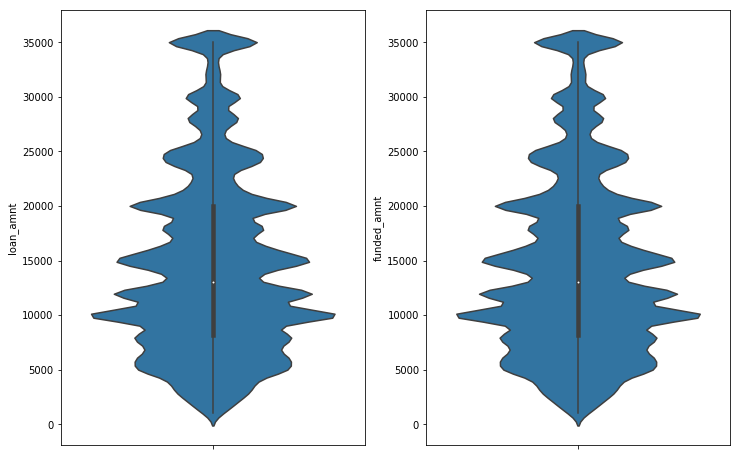

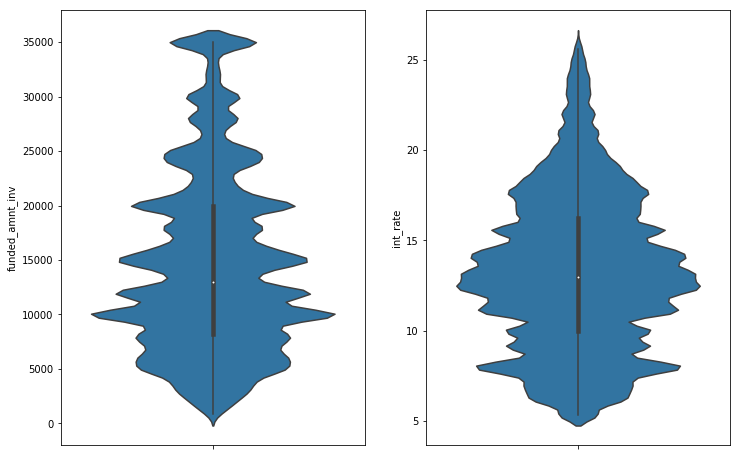

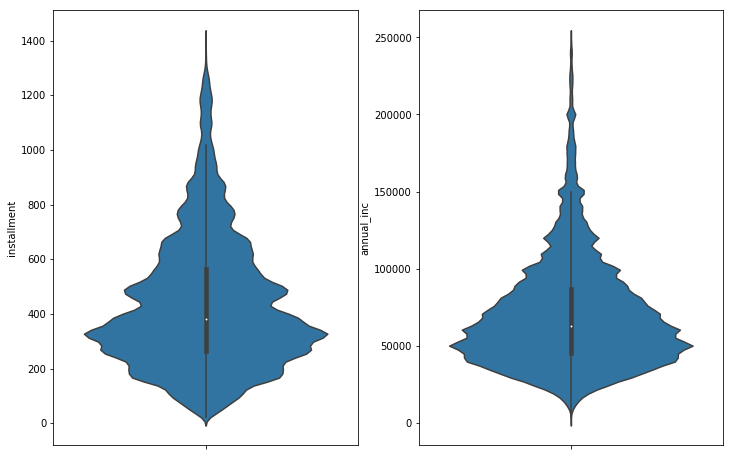

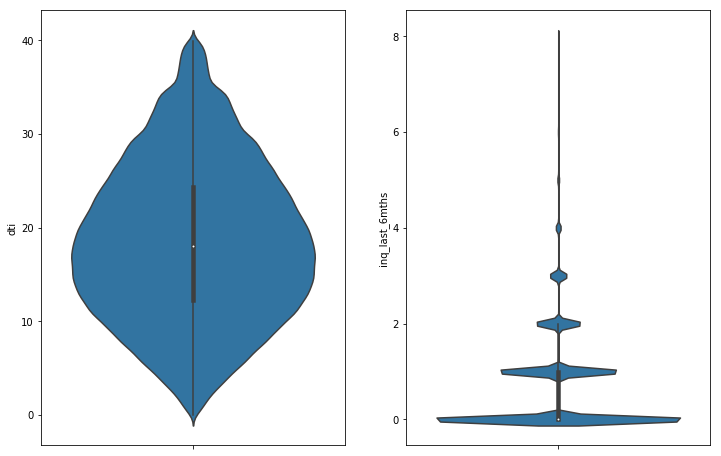

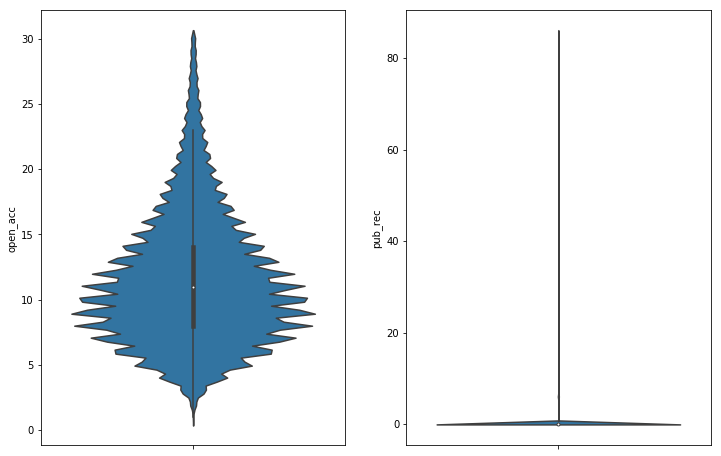

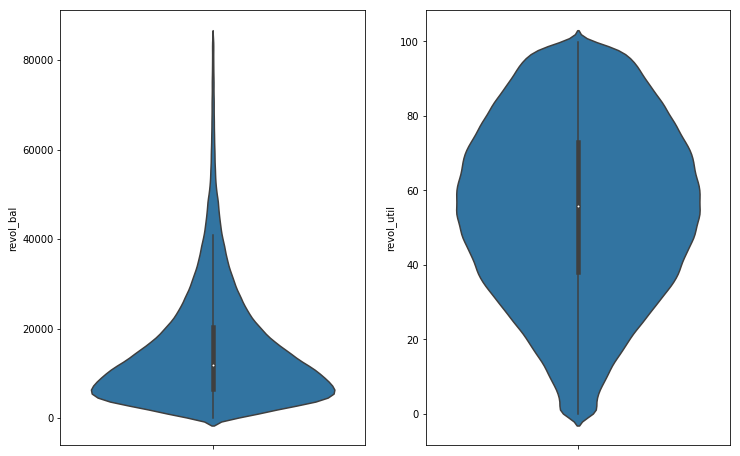

In [187]:
###################################################################After Log###########################

import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 2
n_rows = 6

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols, figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=data,ax=ax[j])

IndexError: index 1 is out of bounds for axis 0 with size 1

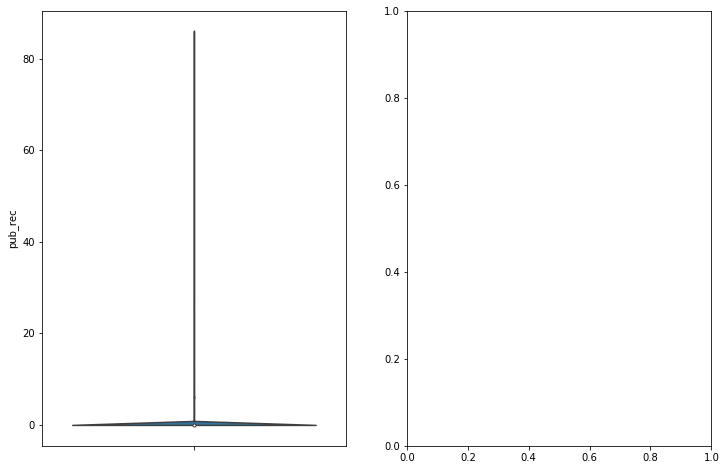

In [188]:
#################################################################before log########################


data=dffun_[['pub_rec']]

size=1

cols=data.columns

n_cols = 2
n_rows = 6

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols, figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=data,ax=ax[j])



IndexError: index 2 is out of bounds for axis 0 with size 2

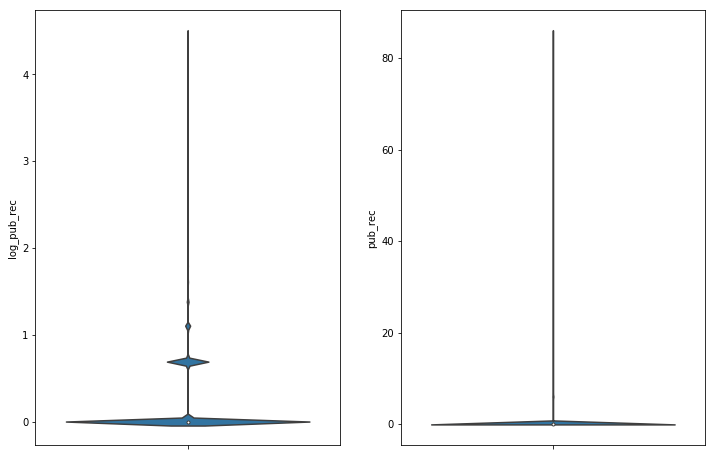

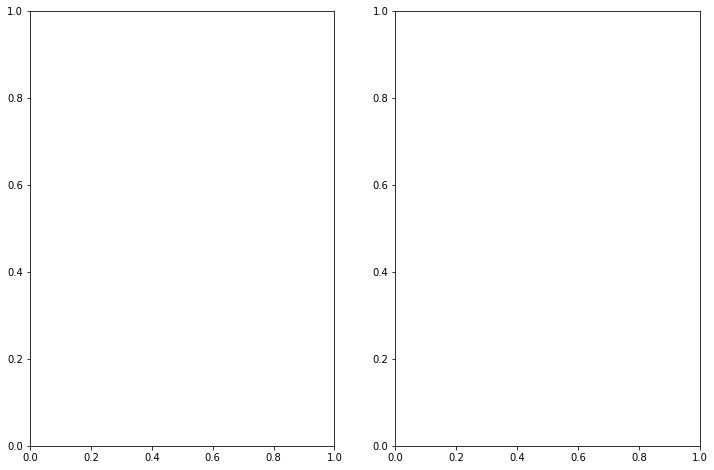

In [189]:

##############################################log

data=dffun_[['log_pub_rec','pub_rec']]

size=1

cols=data.columns

n_cols = 2
n_rows = 6

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols, figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=data,ax=ax[j])

In [190]:
size = 15
data = vissk

In [191]:
data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,return_per,total_pay_f,log_pub_rec
loan_amnt,1.000000,0.999999,0.999994,0.124342,0.943642,0.484498,0.041243,-0.035840,0.190331,-0.095397,0.474172,0.122194,0.211374,0.317062,0.411136,0.173300,0.928936,-0.117852
funded_amnt,0.999999,1.000000,0.999995,0.124340,0.943644,0.484494,0.041242,-0.035845,0.190327,-0.095397,0.474170,0.122194,0.211370,0.317060,0.411134,0.173305,0.928940,-0.117852
funded_amnt_inv,0.999994,0.999995,1.000000,0.124238,0.943629,0.484556,0.041160,-0.035824,0.190338,-0.095377,0.474157,0.122121,0.211386,0.317078,0.411182,0.173236,0.928907,-0.117819
int_rate,0.124342,0.124340,0.124238,1.000000,0.109860,-0.126892,0.164010,0.237396,-0.019739,0.048539,-0.039269,0.260338,-0.049414,-0.094032,-0.235438,0.318074,0.222029,0.058167
installment,0.943642,0.943644,0.943629,0.109860,1.000000,0.466084,0.026878,-0.003095,0.173763,-0.084054,0.442509,0.133141,0.187472,0.275992,0.370373,0.080130,0.840775,-0.105206
annual_inc,0.484498,0.484494,0.484556,-0.126892,0.466084,1.000000,-0.231841,0.047443,0.196871,-0.019265,0.392836,0.057109,0.268106,0.489460,0.364104,0.019119,0.427107,-0.035316
dti,0.041243,0.041242,0.041160,0.164010,0.026878,-0.231841,1.000000,-0.006421,0.302364,-0.058035,0.224828,0.171106,0.224583,0.018233,0.108578,0.092971,0.068112,-0.064915
inq_last_6mths,-0.035840,-0.035845,-0.035824,0.237396,-0.003095,0.047443,-0.006421,1.000000,0.117467,0.067076,-0.046191,-0.086925,0.140188,0.030438,-0.004881,-0.000240,-0.031927,0.079966
open_acc,0.190331,0.190327,0.190338,-0.019739,0.173763,0.196871,0.302364,0.117467,1.000000,-0.033306,0.316320,-0.155985,0.675554,0.255226,0.451160,0.031090,0.176466,-0.038852
pub_rec,-0.095397,-0.095397,-0.095377,0.048539,-0.084054,-0.019265,-0.058035,0.067076,-0.033306,1.000000,-0.166522,-0.088848,0.014518,-0.081411,-0.146289,0.020296,-0.076647,0.919162


In [192]:
data_corr = data.corr()

In [193]:
cols=data.columns

In [194]:
# Set the threshold to select only highly correlated attributes
threshold = 0.5

In [195]:
# List of pairs along with correlation above threshold
corr_list = []


In [196]:
#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index
            
            #Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

In [197]:
#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

loan_amnt and funded_amnt = 1.00
funded_amnt and funded_amnt_inv = 1.00
loan_amnt and funded_amnt_inv = 1.00
funded_amnt and installment = 0.94
loan_amnt and installment = 0.94
funded_amnt_inv and installment = 0.94
revol_bal and total_rev_hi_lim = 0.73
open_acc and total_acc = 0.68


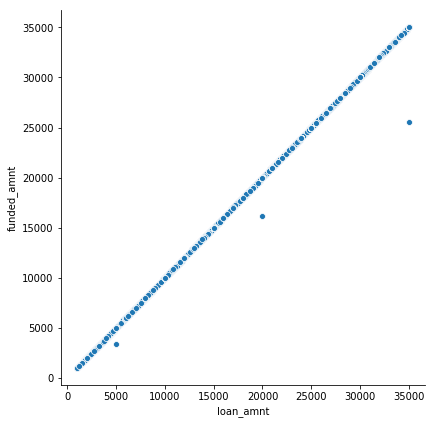

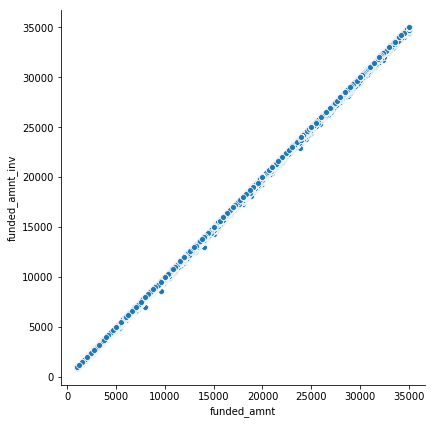

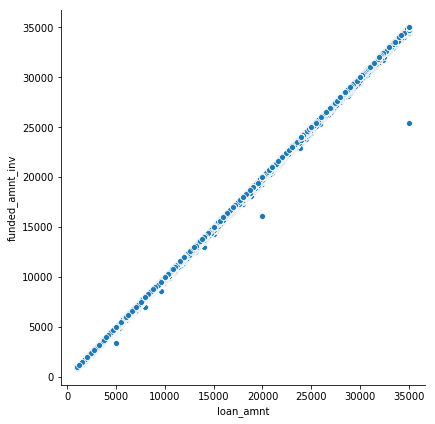

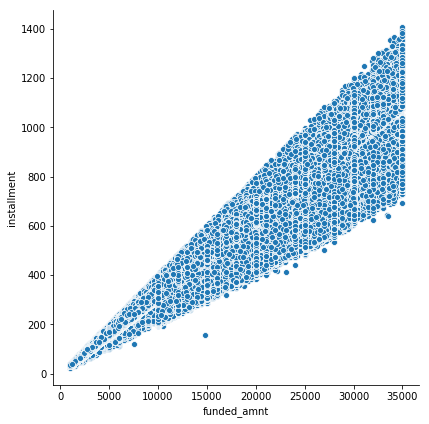

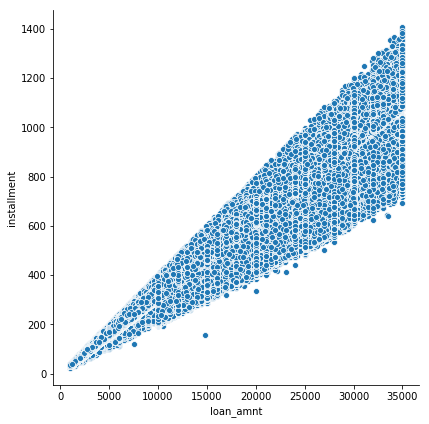

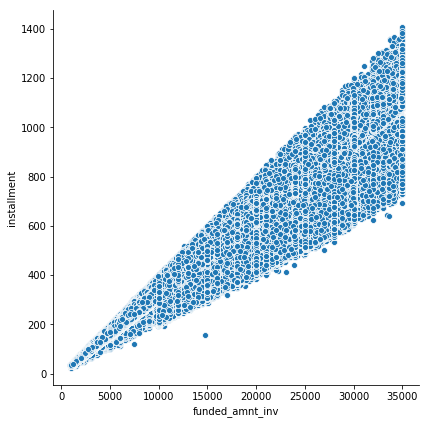

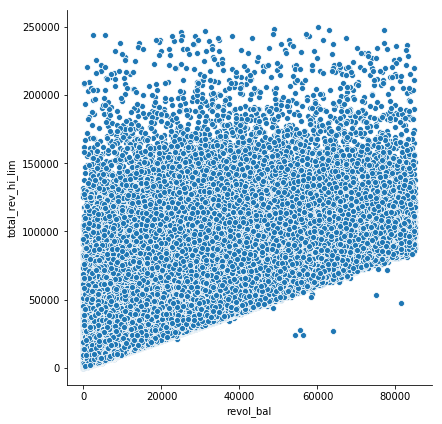

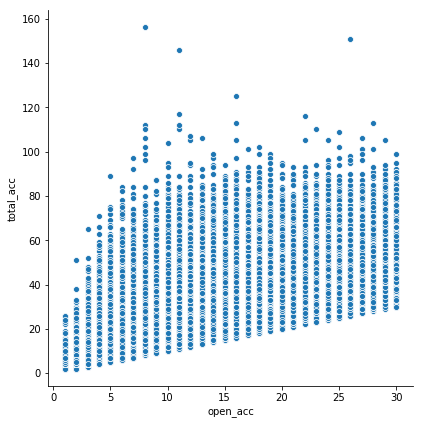

In [199]:
# PairPlot

for v,i,j in s_corr_list:
    sns.pairplot(data, height=6, x_vars=cols[i],y_vars=cols[j])
plt.show()

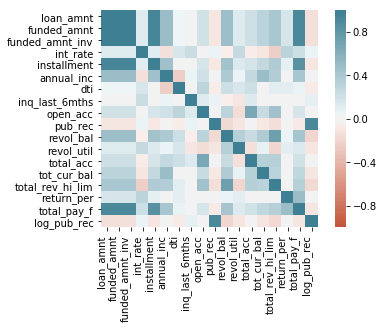

In [200]:
#Visulaize Corrlations 

corr = data.corr()
import seaborn as sns

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation= 'vertical',
    horizontalalignment='right'
);


In [201]:
data=dffun_[['grade','sub_grade','emp_title',
                 'emp_length','home_ownership','verification_status','issue_d','loan_status', 'pymnt_plan', 'purpose', 'title',
                 'addr_state','earliest_cr_line','last_credit_pull_d','issue_date',  
                 'lc_fun',
               'over_15']]


In [202]:
# If Emp Length is null then use 10+ years because of mode

dffun_['emp_length'] = dffun_['emp_length'].replace(np.nan, '10+ Years', regex=True)
count_nan = len(df) - df.count()


In [203]:
# Selecting number of years emp

dffun_["yr_emp_int"] = dffun_.emp_length.str.extract('(\d+)').astype(int)


In [204]:
#Create variable if emp is over 5 years then 1 else 0

def f(row):
    if row['yr_emp_int'] > 5:
        val = 1
    else:
        val = 0
    return val

dffun_["emp_more_fiv"] = dffun_.apply(f,axis=1)

In [215]:
dffun_.head(100).reset_index(drop=True)
dfsmp = dffun_.head(100).reset_index(drop=True)

In [206]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns

In [216]:
aa = dfsmp[['grade','return_per']].reset_index(drop=True)
print(aa)
aa.columns = ['grade', 'value']
print(aa)

   grade  return_per
0      B    1.179958
1      C    1.232198
2      A    1.106136
3      B    1.113314
4      A    1.143906
5      B    1.197087
6      B    1.211924
7      C    1.272108
8      B    1.157595
9      B    1.060511
10     A    1.122606
11     D    1.591555
12     C    1.249754
13     B    1.193842
14     B    1.179987
15     E    1.691238
16     C    1.046602
17     B    1.179957
18     B    1.074483
19     B    1.150303
20     A    1.122598
21     B    1.171993
22     D    1.326583
23     C    1.468903
24     B    1.121450
25     C    1.174594
26     E    1.609582
27     C    0.302325
28     C    1.232192
29     B    1.038338
..   ...         ...
70     A    1.143925
71     C    1.448825
72     C    1.184430
73     B    1.197087
74     A    1.065516
75     C    1.196231
76     B    1.179965
77     C    1.448830
78     A    1.088537
79     E    0.454737
80     C    0.375855
81     A    1.122618
82     B    1.079431
83     C    1.249747
84     C    1.198610
85     C    1

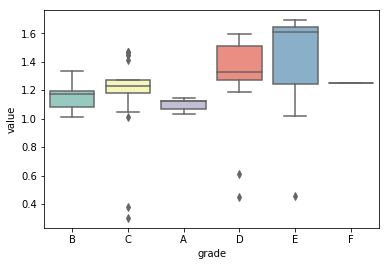

In [210]:
sns.boxplot(x ="grade" ,y ="value" ,  data = aa, palette = "Set3")

In [217]:
model = ols('value ~ C(grade)', data = aa).fit()

In [221]:
dfsmp = dffun_.reset_index(drop=True)
aa = dfsmp[['grade','return_per']].reset_index(drop=True)
print(aa)
aa.columns = ['grade', 'value']
print(aa)

       grade  return_per
0          B    1.179958
1          C    1.232198
2          A    1.106136
3          B    1.113314
4          A    1.143906
5          B    1.197087
6          B    1.211924
7          C    1.272108
8          B    1.157595
9          B    1.060511
10         A    1.122606
11         D    1.591555
12         C    1.249754
13         B    1.193842
14         B    1.179987
15         E    1.691238
16         C    1.046602
17         B    1.179957
18         B    1.074483
19         B    1.150303
20         A    1.122598
21         B    1.171993
22         D    1.326583
23         C    1.468903
24         B    1.121450
25         C    1.174594
26         E    1.609582
27         C    0.302325
28         C    1.232192
29         B    1.038338
...      ...         ...
749442     A    1.112214
749443     C    1.387735
749444     D    0.244290
749445     B    1.197087
749446     B    1.319287
749447     D    1.301903
749448     A    1.132054
749449     D    1.448955


In [222]:
anova_table = sm.stats.anova_lm(model, typ =1 )

In [223]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(grade),5.0,0.515846,0.103169,1.952595,0.092934
Residual,94.0,4.966679,0.052837,NaN,NaN


In [224]:
m_comp = pairwise_tukeyhsd(endog = aa['value'], groups = aa['grade'] , alpha =0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  A      B     0.0542  0.052  0.0565  True 
  A      C     0.1195  0.1172 0.1217  True 
  A      D     0.1778  0.1753 0.1804  True 
  A      E     0.2644  0.2613 0.2675  True 
  A      F     0.3223  0.3174 0.3271  True 
  B      C     0.0652  0.0633 0.0672  True 
  B      D     0.1236  0.1213 0.1259  True 
  B      E     0.2102  0.2073 0.2131  True 
  B      F     0.2681  0.2634 0.2728  True 
  C      D     0.0584  0.0561 0.0606  True 
  C      E     0.1449  0.142  0.1478  True 
  C      F     0.2028  0.1981 0.2075  True 
  D      E     0.0866  0.0834 0.0897  True 
  D      F     0.1445  0.1396 0.1493  True 
  E      F     0.0579  0.0527 0.0631  True 
-------------------------------------------


In [245]:
df_final = dffun_[['loan_amnt','dti','int_rate','annual_inc','inq_last_6mths','open_acc','log_pub_rec','revol_bal',
                   'revol_util','tot_cur_bal','lc_fun_amt','delinq_2yrs','total_pay_f','acc_now_delinq','out_prncp_inv','num_month',
                   'emp_more_fiv','lc_fun','grade','sub_grade', 'home_ownership','verification_status','purpose','addr_state','return_per','installment','over_15'
                   ]].reset_index(drop=True)
print(df_final)

        loan_amnt    dti  int_rate  annual_inc  inq_last_6mths  open_acc  \
0         27050.0  22.87     10.99     55000.0             0.0      14.0   
1          9750.0  25.12     13.98     26000.0             0.0      12.0   
2         12000.0  14.05      6.62    105000.0             1.0      12.0   
3         12000.0  16.94     13.53     40000.0             0.0       7.0   
4         15000.0  16.51      8.90     63000.0             0.0       8.0   
5         12000.0  13.03     11.99    130000.0             1.0       9.0   
6         14000.0  10.02     12.85     88000.0             0.0       6.0   
7          7550.0   8.40     16.24     28000.0             0.0       4.0   
8         10000.0  15.55      9.67    102000.0             0.0       9.0   
9          3000.0  24.68     12.85     25000.0             0.0       5.0   
10        12000.0  12.61      7.62     96500.0             0.0      17.0   
11        27600.0  23.13     19.97     73000.0             1.0      10.0   
12        11

In [246]:
#State Dictonary for regions to use instead of states.
states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

In [247]:
df_final['addr_state']= df_final['addr_state'].map(states)


In [248]:
df_final.addr_state.value_counts()

S    246984
W    211711
N    171703
M    113330
O      5744
Name: addr_state, dtype: int64

In [249]:
#If a 36 month term then 1, if 60 then 0


def mth(xa):
    if xa['num_month'] == 36:
        val = 1
    else:
        val=  0
    return val

df_final['num_month'] = df_final.apply(mth,axis = 1)

count = df_final.emp_more_fiv.value_counts()


In [252]:
# continous variable

df_final_cont = dffun_[['loan_amnt','int_rate', 'annual_inc', 'inq_last_6mths','open_acc','log_pub_rec','revol_bal',
                   'revol_util','tot_cur_bal','lc_fun_amt','delinq_2yrs','total_pay_f','acc_now_delinq','out_prncp_inv']]

In [253]:
# Boolean 

df_final_boo = dffun_[[
        'emp_more_fiv',
        'lc_fun',]]


In [254]:
#Categorical_varaible 

df_final_cat = df_final[['grade','sub_grade','home_ownership','verification_status','purpose','addr_state']]

In [255]:
#Create Variable for Payment to Income Ratio

df_final['per_month'] = df_final['annual_inc']/12
df_final['pay_to_income'] = df_final['installment']/df_final['per_month']

In [256]:
# Modeling import, prevent from running full code.
import pandas as pd
import numpy as np
import os

path="C:/Users/g6falle/Desktop/Folders/Python/LC"

os.chdir(path)

x=pd.read_csv('x.csv')

Y=pd.read_csv('y.csv')

In [257]:
# DUMMY VARIABLE IF GRADE IS ADDED INTO X 

xc = pd.get_dummies(x, columns = ['grade'])

In [258]:
# Splitting the dataset 70/30

from sklearn.model_selection import train_test_split
x_train, x_test ,Y_train ,Y_test = train_test_split(xc,Y, test_size= 0.30, random_state = 0)

In [259]:
##################################################################fitting the logisitic regression to the training set################################
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(fit_intercept = True, random_state = 0)
classifier.fit(x_train,Y_train)

C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [260]:
#prediciting the test set results
Y_pred = classifier.predict(x_test)

In [261]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)


In [262]:

print('Accuracy:{:.2f}'.format(classifier.score(x_test,Y_test)))


Accuracy:0.67


In [263]:
#f-1 score
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.57      0.13      0.21     77134
           1       0.68      0.95      0.79    147708

   micro avg       0.67      0.67      0.67    224842
   macro avg       0.62      0.54      0.50    224842
weighted avg       0.64      0.67      0.59    224842



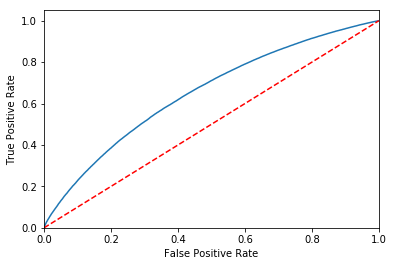

In [264]:
#ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.savefig('Log_ROC')
plt.show()

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/500
524630/524630 [==============================] - 1s 2us/step - loss: 0.6930 - acc: 0.5374
Epoch 2/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6926 - acc: 0.6576
Epoch 3/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6921 - acc: 0.6576
Epoch 4/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6916 - acc: 0.6576
Epoch 5/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6912 - acc: 0.6576
Epoch 6/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6907 - acc: 0.6576
Epoch 7/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6902 - acc: 0.6576
Epoch 8/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6898 - acc: 0.6576
Epoch 9/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6

524630/524630 [==============================] - 1s 1us/step - loss: 0.6691 - acc: 0.6576
Epoch 65/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6688 - acc: 0.6576
Epoch 66/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6685 - acc: 0.6576
Epoch 67/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6682 - acc: 0.6576
Epoch 68/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6679 - acc: 0.6576
Epoch 69/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6677 - acc: 0.6576
Epoch 70/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6674 - acc: 0.6576
Epoch 71/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6671 - acc: 0.6576
Epoch 72/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6668 - acc: 0.6576
Epoch 73/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.66

524630/524630 [==============================] - 1s 1us/step - loss: 0.6528 - acc: 0.6576
Epoch 144/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6527 - acc: 0.6576
Epoch 145/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6525 - acc: 0.6576
Epoch 146/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6524 - acc: 0.6576
Epoch 147/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6523 - acc: 0.6576
Epoch 148/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6522 - acc: 0.6576
Epoch 149/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6520 - acc: 0.6576
Epoch 150/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6519 - acc: 0.6576
Epoch 151/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6518 - acc: 0.6576
Epoch 152/500
524630/524630 [==============================] - 1s 1us/step - l

524630/524630 [==============================] - 1s 1us/step - loss: 0.6459 - acc: 0.6576
Epoch 222/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6459 - acc: 0.6576
Epoch 223/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6458 - acc: 0.6576
Epoch 224/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6458 - acc: 0.6576
Epoch 225/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6457 - acc: 0.6576
Epoch 226/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6457 - acc: 0.6576
Epoch 227/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6456 - acc: 0.6576
Epoch 228/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6456 - acc: 0.6576
Epoch 229/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6455 - acc: 0.6576
Epoch 230/500
524630/524630 [==============================] - 1s 1us/step - l

524630/524630 [==============================] - 1s 1us/step - loss: 0.6435 - acc: 0.6576
Epoch 300/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6435 - acc: 0.6576
Epoch 301/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 302/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 303/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 304/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 305/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 306/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 307/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6434 - acc: 0.6576
Epoch 308/500
524630/524630 [==============================] - 1s 1us/step - l

524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 378/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 379/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 380/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 381/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 382/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 383/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 384/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 385/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6428 - acc: 0.6576
Epoch 386/500
524630/524630 [==============================] - 1s 1us/step - l

524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 456/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 457/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 458/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 459/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 460/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 461/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 462/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 463/500
524630/524630 [==============================] - 1s 1us/step - loss: 0.6427 - acc: 0.6576
Epoch 464/500
524630/524630 [==============================] - 1s 1us/step - l

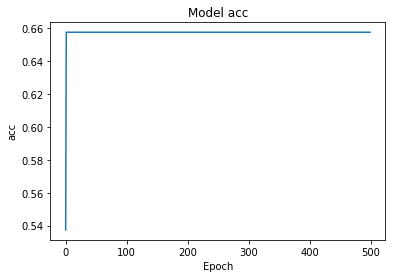

In [266]:
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(12, input_dim = 18, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
az = model.fit(x_train, Y_train,  epochs=500, batch_size=200000)
accuracy = model.evaluate(x_train, Y_train)
Y_Pred_NT = model.predict_classes(x_test)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


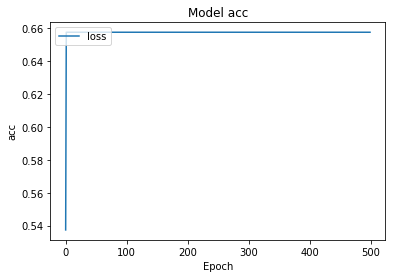

In [267]:
plt.plot(az.history['acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['loss', 'Accu'], loc='upper left')
plt.show()

In [268]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


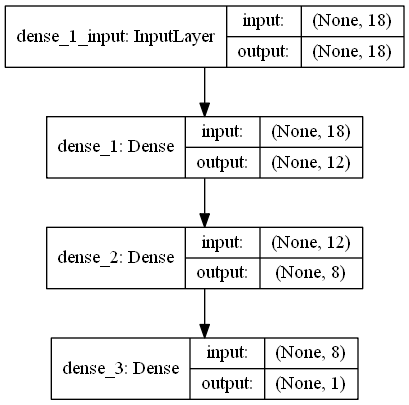

In [269]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [271]:
# Fitting Random Forest classifier to the training set overfit 
from sklearn.ensemble import RandomForestClassifier
classifier_r = RandomForestClassifier(n_estimators = 100 ,  random_state =0, n_jobs = -1, oob_score = True, bootstrap = True )
classifier_r.fit(x_train,Y_train)


C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [272]:
#SCORE

print('R^2 Training Score: {:.4f} \nOOB Score: {:.4f} \nR^2 Test Score: {:.4f}'.format(classifier_r.score(x_train, Y_train), 
                                                                                             classifier_r.oob_score_,
                                                                                             classifier_r.score(x_test, Y_test)))


R^2 Training Score: 1.0000 
OOB Score: 0.8055 
R^2 Test Score: 0.8098


In [273]:

# Fitting Random Forest classifier to the training set remove overfitting
from sklearn.ensemble import RandomForestClassifier
classifier_r1 = RandomForestClassifier(n_estimators = 300 , max_depth = 10,  random_state =0, n_jobs = -1, oob_score = True, bootstrap = True )
classifier_r1.fit(x_train,Y_train)



C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 Training Score: 0.8083 
OOB Score: 0.8083 
R^2 Test Score: 0.8086


In [274]:

#SCORE
print('R^2 Training Score: {:.4f} \nOOB Score: {:.4f} \nR^2 Test Score: {:.4f}'.format(classifier_r1.score(x_train, Y_train), 
                                                                                             classifier_r1.oob_score_,
                                                                                             classifier_r1.score(x_test, Y_test)))


R^2 Training Score: 0.8083 
OOB Score: 0.8083 
R^2 Test Score: 0.8086


In [275]:
#SCORE FOR CROSS VALIDATION
from sklearn.model_selection import cross_val_score
score_RF = cross_val_score(classifier_r1, xc, Y, cv =5, scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (score_RF.mean(), score_RF.std() *2))
df_final_list = list(xc.columns)

C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\g6falle\AppData\Local\Continuum\anaconda3\l

Accuracy: 0.81 (+/- 0.06)


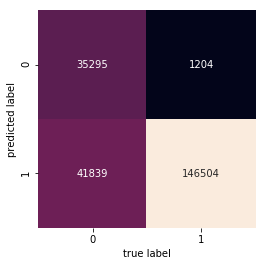

In [276]:
# CONFUSION MATRIX PLOT

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred_cl = classifier_r1.predict(x_test)
mat = confusion_matrix(Y_test, y_pred_cl)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [308]:
#Create using Max Depth 3 for Tree Visualization
from sklearn.ensemble import RandomForestClassifier
classifier_r1 = RandomForestClassifier(n_estimators = 300 , max_depth = 3,  random_state =0, n_jobs = -1, oob_score = True, bootstrap = True )
classifier_r1.fit(x_train,Y_train)

# Tree Plot for using Max Depth = 3 for visualization
col_list = list(xc.columns)

C:\Users\g6falle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [309]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [311]:
# Pull out one tree from the forest
tree = classifier_r1.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = classifier_r1.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = col_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.jpg')


In [312]:
from IPython.display import Image

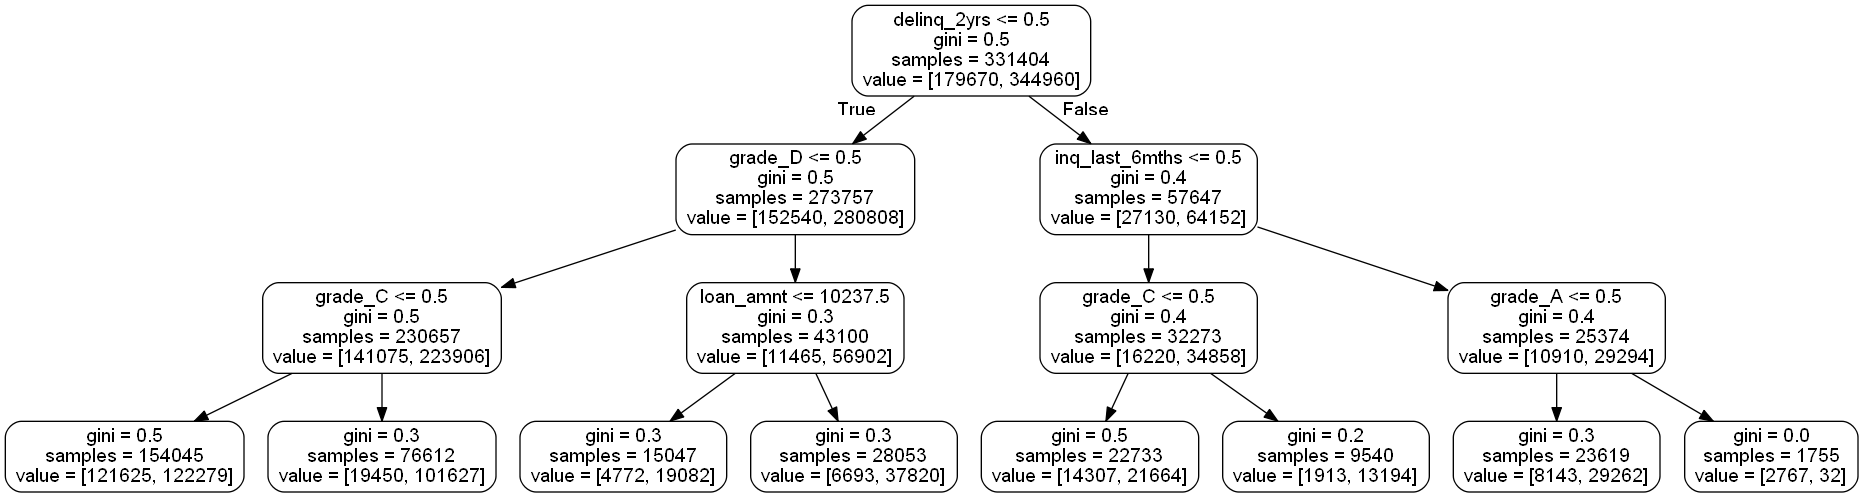

In [313]:
img = 'C:/Users/g6falle/Desktop/Folders/Python/LC/tree.jpg'
Image(filename=img)

In [355]:
# Get numerical feature importances
importances = list(classifier_r1.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(x, round(importance, 4)) for x, importance in zip(col_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: grade_A              Importance: 0.5254
Variable: grade_C              Importance: 0.1847
Variable: grade_D              Importance: 0.1163
Variable: revol_util           Importance: 0.0545
Variable: grade_E              Importance: 0.0413
Variable: grade_B              Importance: 0.0229
Variable: dti                  Importance: 0.021
Variable: loan_amnt            Importance: 0.013
Variable: pay_to_income        Importance: 0.0068
Variable: annual_inc           Importance: 0.006
Variable: inq_last_6mths       Importance: 0.0042
Variable: grade_F              Importance: 0.0018
Variable: log_pub_rec          Importance: 0.001
Variable: delinq_2yrs          Importance: 0.001
Variable: lc_fun               Importance: 0.0002
Variable: open_acc             Importance: 0.0
Variable: acc_now_delinq       Importance: 0.0
Variable: emp_more_fiv         Importance: 0.0


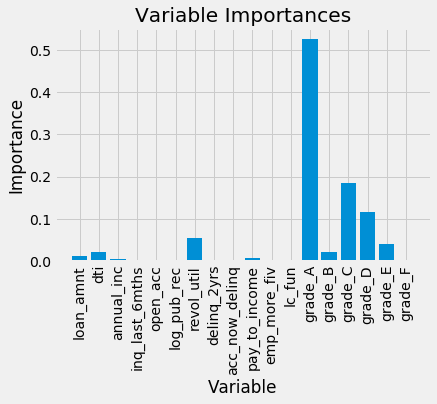

In [356]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df_final_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [357]:
from treeinterpreter import treeinterpreter as ti,utils


In [358]:
selected_rows = [18,13]
selected_df = x_train.iloc[selected_rows,:].values

In [359]:
prediction, bias, contributions = ti.predict(classifier_r1, selected_df)

In [361]:
aa = np.array(Y_train)

for i in range(len(selected_rows)):
    print("Row", selected_rows[i])
    print("Prediction:", prediction[i][0])                   , print( 'Actual Value:', aa[selected_rows[i]])
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 x_train.columns), 
                             key=lambda x: np.logical_not(x[0]).any()):
        print(feature, round(c[i],4))
    print("-"*20)


Row 18
Prediction: 0.23029803868526091
Actual Value: [1]
Bias (trainset mean) [0.34246845 0.65753155]
Feature contributions:
loan_amnt -0.0025
dti 0.0072
annual_inc 0.0027
inq_last_6mths -0.0022
open_acc 0.0001
log_pub_rec 0.0002
revol_util -0.0136
delinq_2yrs 0.0004
acc_now_delinq 0.0
pay_to_income -0.0013
lc_fun 0.0003
grade_A -0.0587
grade_B -0.005
grade_C 0.0247
grade_D -0.0679
grade_E 0.0034
grade_F 0.0001
emp_more_fiv 0.0
--------------------
Row 13
Prediction: 0.3157504990452452
Actual Value: [1]
Bias (trainset mean) [0.34246845 0.65753155]
Feature contributions:
loan_amnt -0.0059
dti 0.0111
annual_inc 0.0036
inq_last_6mths -0.0008
open_acc -0.0001
log_pub_rec -0.0001
revol_util 0.0143
delinq_2yrs -0.0003
acc_now_delinq -0.0
pay_to_income 0.0017
grade_A 0.0606
grade_B -0.0084
grade_C -0.03
grade_D -0.0143
grade_E -0.0045
grade_F -0.0002
emp_more_fiv 0.0
lc_fun 0.0
--------------------
